# t-Distributed Stochastic Neighbor Embedding

### Goal

- Is a probabilistic approach based on SNE, used to project data from high dimensions to lower ones while retaining local and preserving global structures. 

### Overview

- Is an manifold learning, non-linear, unsupervised learning method.

- Tries to preserve local structure of data.

- Involves Hyperparameters.

- Not affected by outliers.

- Is a randomized, stochastic, method.

- For mixed and categorical data use a distances that considers both, numerica and categorical impact, for example Gower’s distance.



### Steps for the algortihm.

Step 1: Standarize data. (continuos variables)
- Data with mean = 0, standard deviation = 1

Step 2: Compute pairwise distances.
- Distance matrix.

Step 3: Convert distances in high space into normal distribution conditional probabilities.
- Normal conditional probability matrix using distance matrix.

Step 4: Updates the probabilities by making them symmetrical.
- Average of symetrical probabilities.

Step 5: Choose a random lower dimension projection.
- Random initial projection.

Step 6: Compute distances for lower dimension data.
- Distance matrix for initial projection.

Step 7: Convert distances in low space into t distibuted conditional probabilities.
- t conditional probability matrix using distance matrix of low space projection.

Step 8: Compute gradient for optimal direction.
- Find the direction where similarity matrices in original and lower dimensions are less different.

Step 9: Update the solution of lower dimension.
- After each iteration, update new values of projection coordinates, distances and gradient. 

Step 10: if iteration exceeds max iter parameter, stop, else keep iterating steps 6-9.
- Repeat until done or stops.

# Sklearn has a function for t-SNE.

[link for function doc](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)


[link for hyperparameter interactive visuals](https://observablehq.com/@robstelling/t-sne_en)

# Some important hyperparameters:

- ***n_components*** : Dimension of the embedded space, this is the lower dimension that we want the high dimension data to be converted to. The default value is 2 for 2-dimensional space.

- ***Perplexity*** : The perplexity is related to the number of nearest neighbors that are used in t-SNE algorithms. Larger datasets usually require a larger perplexity. Perplexity can have a value between 5 and 50. The default value is 30.

- ***n_iter*** : Maximum number of iterations for optimization. Should be at least 250 and the default value is 1000

- ***learning_rate*** : The learning rate for t-SNE is usually in the range [10.0, 1000.0] with the default value of 200.0.

# Simple example - 3D data and original coordinates

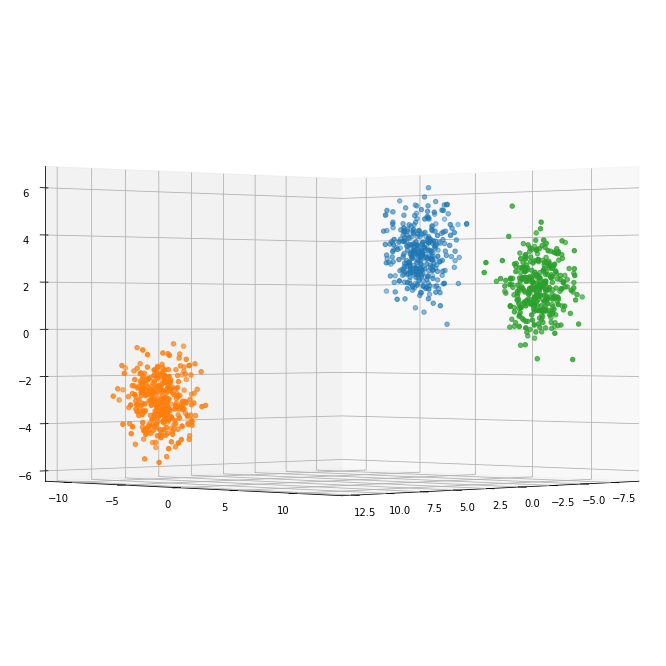

In [1]:
# libraries
from sklearn.datasets import make_blobs
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import matplotlib.colors

# sample data
X, y = make_blobs(n_samples=1000, centers=3, n_features=3,
                  random_state=30)

# 3d plot axes and size
fig = plt.figure(figsize = (16, 12))
ax = plt.axes(projection ="3d")

# Data for three-dimensional scattered points
zdata = X.T[2]
xdata =  X.T[1]
ydata =  X.T[0]

# color map
cm=matplotlib.colors.ListedColormap([plt.get_cmap("tab10")(0),plt.get_cmap("tab10")(1),plt.get_cmap("tab10")(2)])

# 3d scatter plot at value
ax.scatter3D(xdata, ydata, zdata, c=y, cmap=cm)
ax.view_init(0, 45)

# Using t-SNE to embed data to 2D

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.063s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.119568
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.528160
[t-SNE] KL divergence after 1000 iterations: 0.565903


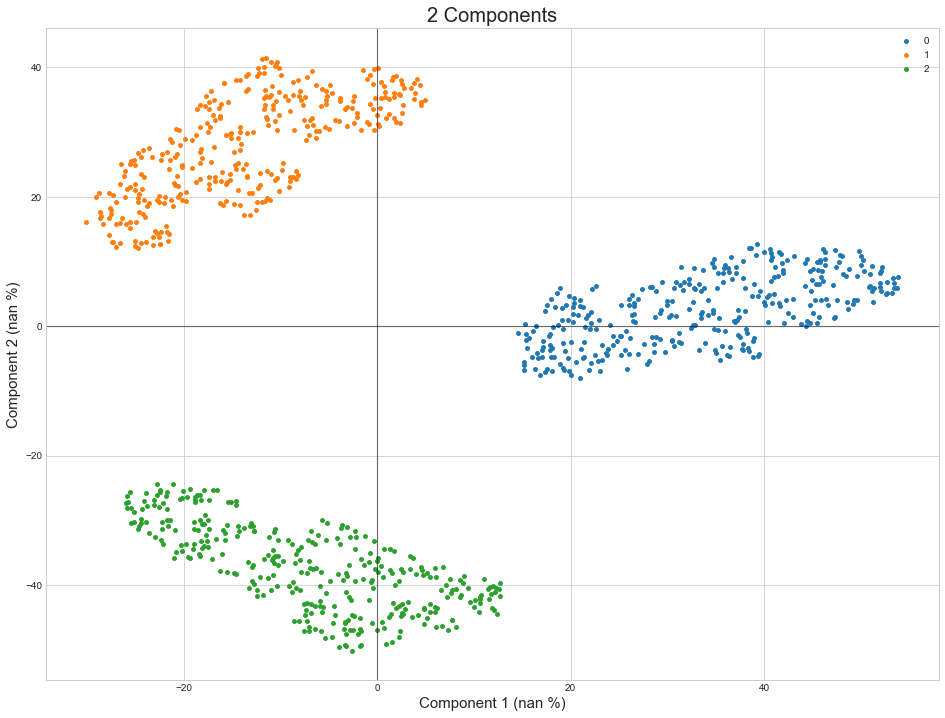

In [2]:
# libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import numpy as np
from Vars_Samples_Plot import vars_samples_plot

# standarize data
standarized_data = pd.DataFrame(StandardScaler().fit_transform(X))

# model for t-sne
model = TSNE(n_components=2, perplexity=30, early_exaggeration=12.0,
 learning_rate=200, n_iter=1000, n_iter_without_progress=300,
 min_grad_norm=1e-07, metric='euclidean',init='random', 
 verbose=1, random_state=0,method='barnes_hut',
 angle=0.5, n_jobs=-1)

# data frame for t-sne rsults
tsne_data = pd.DataFrame(model.fit_transform(standarized_data),
                        columns=["Component1","Component2"])

# data frame for cluster label
y_df=pd.DataFrame(y)

# Visual
vars_samples_plot(ProjectedData = tsne_data ,Loadings = 0*tsne_data , 
    ExplainedVar = list([np.nan,np.nan]), Overlaid = True, Arrow_head_size= 0, Arrow_labels = False,
    Sample_labels=False, Color_by_disc_var=y_df.iloc[:,0])
              

# Changing parameters

Plot was originally generated with n_components=2, perplexity=30, learning_rate=200, and n_iter=1000

### Using perplexity=30, learning_rate=200, and n_iter=5000

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.022s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.119568
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.528160
[t-SNE] KL divergence after 5000 iterations: 0.549577


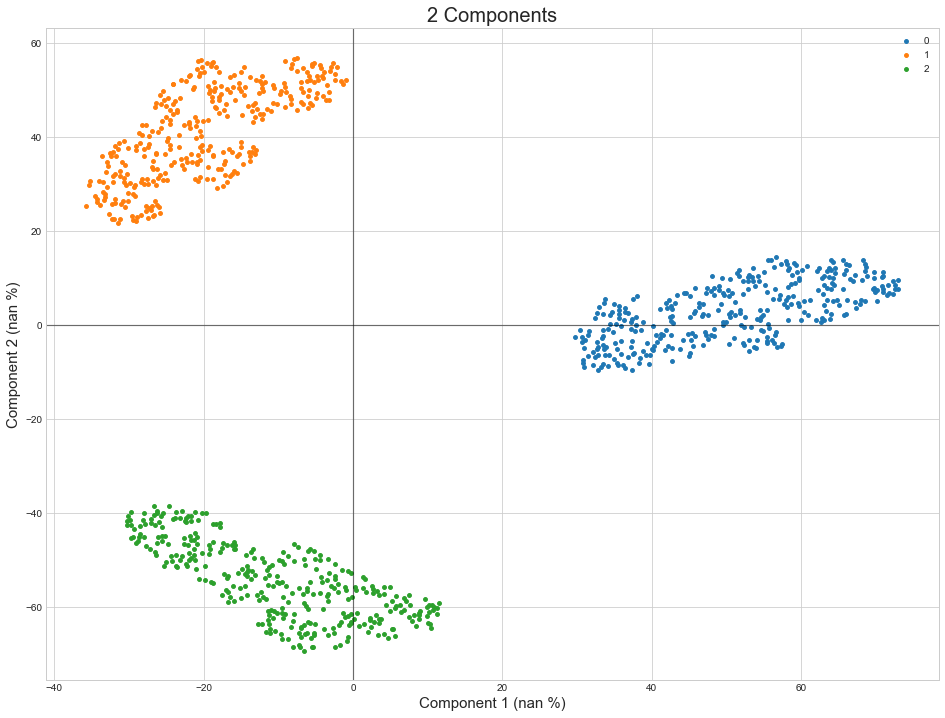

In [3]:
# model for t-sne
model = TSNE(n_components=2, perplexity=30, early_exaggeration=12.0,
 learning_rate=200, n_iter=5000, n_iter_without_progress=300,
 min_grad_norm=1e-07, metric='euclidean',init='random', 
 verbose=1, random_state=0,method='barnes_hut',
 angle=0.5, n_jobs=-1)

# data frame for t-sne rsults
tsne_data = pd.DataFrame(model.fit_transform(standarized_data),
                        columns=["Component1","Component2"])

# Visual
vars_samples_plot(ProjectedData = tsne_data ,Loadings = 0*tsne_data , 
    ExplainedVar = list([np.nan,np.nan]), Overlaid = True, Arrow_head_size= 0, Arrow_labels = False,
    Sample_labels=False, Color_by_disc_var=y_df.iloc[:,0])
              

### Using perplexity=5, learning_rate=200, and n_iter=1000

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.056107
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.017845
[t-SNE] KL divergence after 1000 iterations: 0.658491


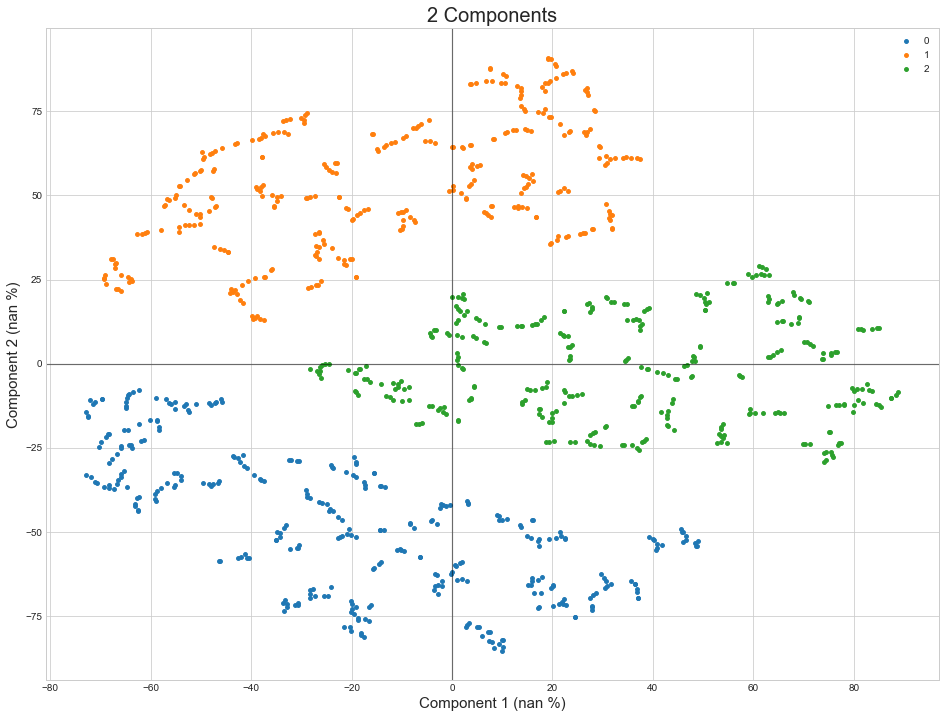

In [4]:
# model for t-sne
model = TSNE(n_components=2, perplexity=5, early_exaggeration=12.0,
 learning_rate=200, n_iter=1000, n_iter_without_progress=300,
 min_grad_norm=1e-07, metric='euclidean',init='random', 
 verbose=1, random_state=0,method='barnes_hut',
 angle=0.5, n_jobs=-1)

# data frame for t-sne rsults
tsne_data = pd.DataFrame(model.fit_transform(standarized_data),
                        columns=["Component1","Component2"])

# Visual
vars_samples_plot(ProjectedData = tsne_data ,Loadings = 0*tsne_data , 
    ExplainedVar = list([np.nan,np.nan]), Overlaid = True, Arrow_head_size= 0, Arrow_labels = False,
    Sample_labels=False, Color_by_disc_var=y_df.iloc[:,0])
              